<a href="https://colab.research.google.com/github/poset26/AI/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library (agent)

In [1]:
from agents import *

Create an instance of agent and enviroment

In [2]:
env = TP_env()
ag = TP_agent(env)

Have the agent run for 100 steps and calculate average spent.

In [3]:
ag.go(100)
avg = ag.spent/100
print(f"Average amount spent = {ag.spent} / 100 = {avg}")

Average amount spent = 88728 / 100 = 887.28


Plot the price and numbers in price history.

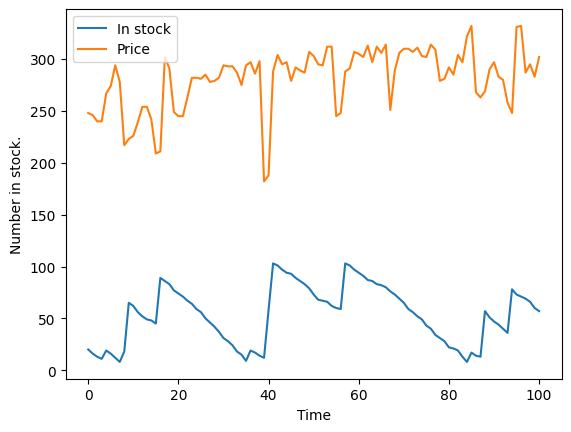

In [23]:
num = len(env.stock_history)
plt.ion()
plt.xlabel("Time")
plt.ylabel("Number in stock.")
plt.plot(range(num), env.stock_history, label="In stock")
plt.plot(range(num), env.price_history, label="Price")
plt.legend(loc="upper left")
plt.draw()

Interpretation of results.


In [20]:
avg_price = sum(env.price_history)/ len(env.price_history)
c = env.stock_history[0]
l = 0
for x,y in zip(env.stock_history[1:],env.price_history[0:-1]):
    if x > c:
        if x- c < 12:
            l += 12
        else:l+= 48
    c = x
print(f"The average price was :{avg_price} \nand the average price at which the agent bought was :{ag.spent/l}")
print(f"The lowest price was :{min(env.price_history)} \nAn the highest price was :{max(env.price_history)}")
print(f"The agent bought :\n\t{int(((ag.spent/l/min(env.price_history))-1)*100)}% above minimum price.\n\t{int((avg_price/(ag.spent/l)-1)*100)}% bellow average price. \n\t{int((max(env.price_history)/(ag.spent/l)-1)*100)}% bellow maximum price.")

The average price was :281.03960396039605 
and the average price at which the agent bought was :231.0625
The lowest price was :182 
An the highest price was :332
The agent bought :
	26% above minimum price.
	21% bellow average price. 
	43% bellow maximum price.


Althought the average price at which the agent bought is considerably higher than the minimum price (almost 27%), its still slightly under the average price (21% less) and more than 43% under the maximum price. (Since there is a certain level of pseudo randomnes and we arent using a seed these values can change wiht the execution, the exact values are the ones stated in the code)

From the plot we see that whenever the agent goes bellow a certain stock threshold it buys a small amount to replenish its stocks no matter the cost. We also see that it buys a bigger amount whenever the price decreases considerably. We can also notice that although the price fluctuates it tends to increase (the linear inflation mentioned in the description) if instead of running 100 times you run it 600 times this becomes more ovbious and it looks like a straigt diagonal.